In [7]:
# mount Google drive
from google.colab import drive
drive.mount('/content/drive')

import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import models
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import requests
import cv2
import numpy as np
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip install torch torchvision opencv-python scikit-image
!pip install -U torch torchvision

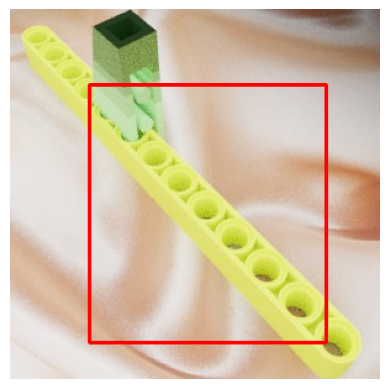

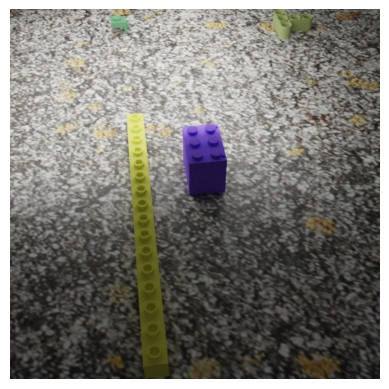

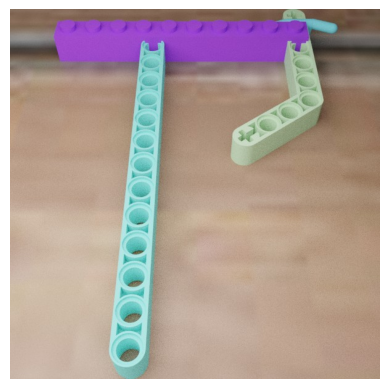

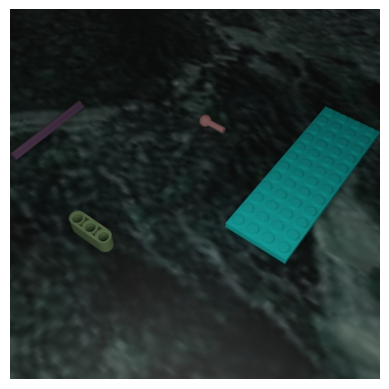

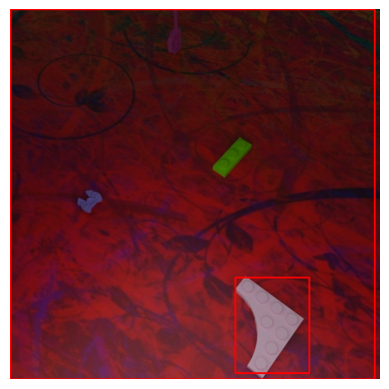

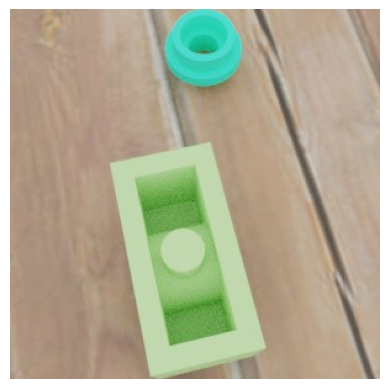

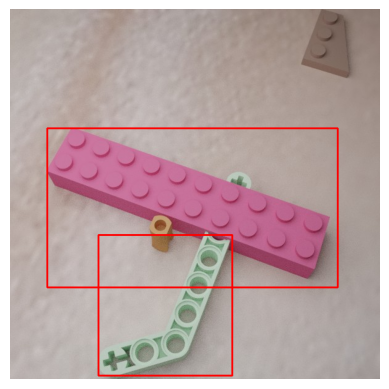

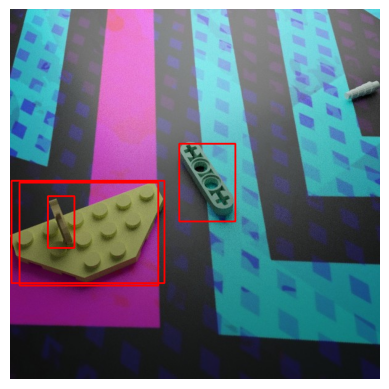

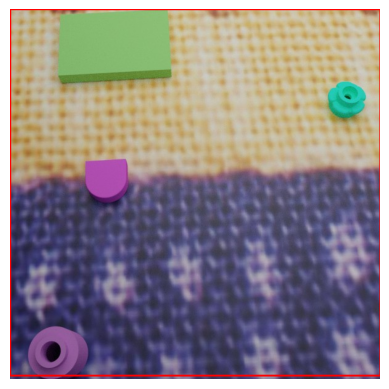

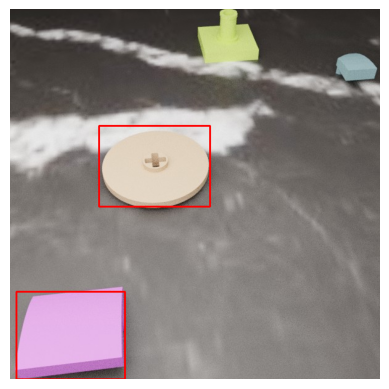

In [11]:
# Directory containing the images
folder_path = '/content/drive/MyDrive/CS5330/Lab3'

# Get list of all .jpg files in the folder
img_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.jpg')]


# Define the transformation for the input image
transform = transforms.Compose([
    transforms.ToTensor()
])

# Function to apply Faster R-CNN on a list of images with confidence threshold
def fasterRCNNtest(image_paths, confidence_threshold):
    """Predicts objects in a list of images using Faster R-CNN.

    Args:
        image_paths: A list of image paths.
        confidence_threshold: Confidence threshold for displaying predictions.

    Returns:
        A list of predictions (bounding boxes) for each image.
    """

    # Load the pre-trained Faster R-CNN model
    model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    model.eval()  # Set the model to evaluation mode

    all_predictions = []

    for image_path in image_paths:
        # Load and preprocess the image
        image = Image.open(image_path)
        image_tensor = transform(image).unsqueeze(0)  # Add a batch dimension

        # Make predictions
        with torch.no_grad():
            outputs = model(image_tensor)

        # Extract bounding boxes and scores
        boxes = outputs[0]['boxes'].cpu().numpy()
        scores = outputs[0]['scores'].cpu().numpy()

        image_predictions = []

        # Collect predictions above the confidence threshold
        for box, score in zip(boxes, scores):
            if score >= confidence_threshold:
                image_predictions.append(box)

        all_predictions.append((image_path, image_predictions))

    return all_predictions

confidence_threshold = 0.5

# Get predictions for the images
predictions = fasterRCNNtest(img_paths, confidence_threshold)

# Print the predictions and visualize the images with bounding boxes
for image_path, boxes in predictions:
    # Load the image for visualization
    image_cv = cv2.imread(image_path)
    image_cv = cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB)

    for box in boxes:
        # Draw the bounding box only
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image_cv, (x1, y1), (x2, y2), (255, 0, 0), 2)

    # Display the image with bounding boxes
    plt.imshow(image_cv)
    plt.axis('off')
    plt.show()

In [12]:
!pip install gradio
import gradio as gr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.24.7
    Uninstalling huggingface-hub-0.24.7:
      Successfully uninstalled huggingface-hub-0.24.7
ERROR: 

In [20]:
import os
import torch
import torchvision.transforms as transforms
import torchvision.models as models
from PIL import Image
import cv2
import gradio as gr
import numpy as np

# Define the transformation for the input image
transform = transforms.Compose([
    transforms.ToTensor()
])

# Load the pre-trained Faster R-CNN model using the updated weights parameter
model = models.detection.fasterrcnn_resnet50_fpn(weights="FasterRCNN_ResNet50_FPN_Weights.DEFAULT")
model.eval()  # Set the model to evaluation mode

# Function to apply Faster R-CNN on a single image with confidence threshold
def fasterRCNNtest_single_image(image, confidence_threshold):
    """Predicts objects in an uploaded image using Faster R-CNN and returns the image with bounding boxes.

    Args:
        image: Uploaded image in PIL format.
        confidence_threshold: Confidence threshold for displaying predictions.

    Returns:
        Image with bounding boxes as a NumPy array.
    """
    # Preprocess the image
    image_tensor = transform(image).unsqueeze(0)  # Add a batch dimension

    # Make predictions
    with torch.no_grad():
        outputs = model(image_tensor)

    # Extract bounding boxes and scores
    boxes = outputs[0]['boxes'].cpu().numpy()
    scores = outputs[0]['scores'].cpu().numpy()

    # Convert PIL image to OpenCV format
    image_cv = np.array(image)
    image_cv = cv2.cvtColor(image_cv, cv2.COLOR_RGB2BGR)

    # Draw bounding boxes for predictions above the confidence threshold
    for box, score in zip(boxes, scores):
        if score >= confidence_threshold:
            x1, y1, x2, y2 = map(int, box)
            cv2.rectangle(image_cv, (x1, y1), (x2, y2), (255, 0, 0), 2)

    # Convert OpenCV image back to PIL format
    result_image = Image.fromarray(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))

    return result_image

# Gradio Interface
gr_interface = gr.Interface(
    fn=fasterRCNNtest_single_image,
    inputs=[
        gr.Image(label="Upload Image", type="pil"),
        gr.Slider(label="Confidence Threshold", minimum=0.1, maximum=1.0, step=0.05, value=0.5)
    ],
    outputs=gr.Image(type="pil", label="Detected Image with Bounding Boxes"),
    title="Faster R-CNN Object Detection",
    description="Upload an image and adjust the confidence threshold to detect objects and display bounding boxes."
)

# Launch the Gradio app
gr_interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://84cb1b1c41c554f496.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
